<a href="https://colab.research.google.com/github/neerajguleria1/driver-drowsiness-detection/blob/main/Day23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   Speed  Alertness  Seatbelt  Drowsy
0    120        0.9         1       0
1     40        0.6         0       0
2    150        0.7         1       0
3    220        0.3         1       1
4     89        0.5         0       0
Predictions: [0, 0, 1, 0]
It show the tree accurracy 100.0 %


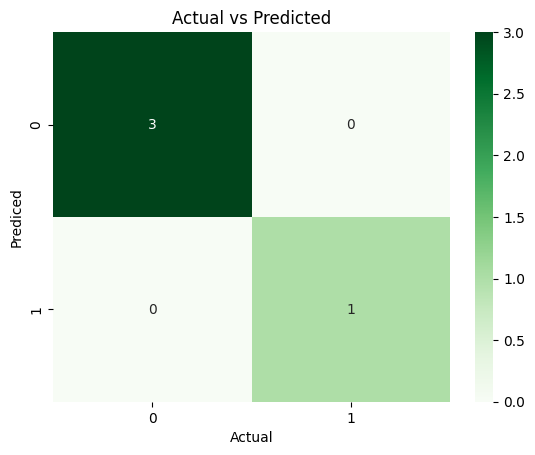


 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         1

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



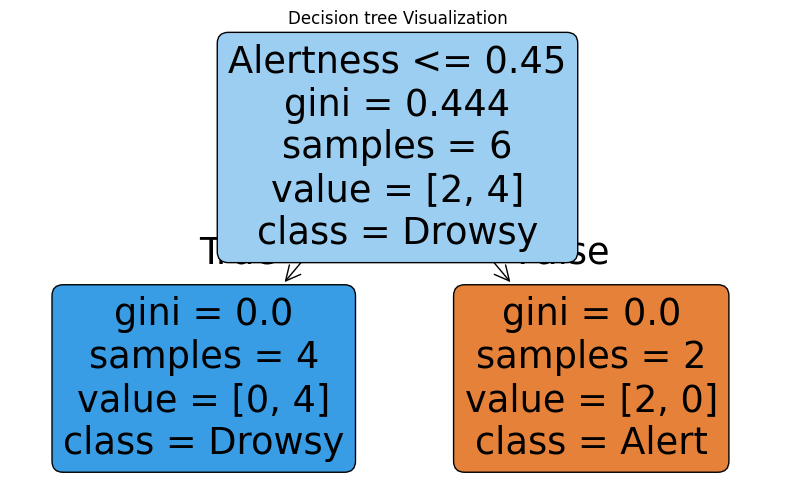

Logistic Regression Accurracy: 100.0 %
Decision Tree Accuracy: 100.0 %
     Feature  Importance
1  Alertness         1.0
0      Speed         0.0
2   Seatbelt         0.0


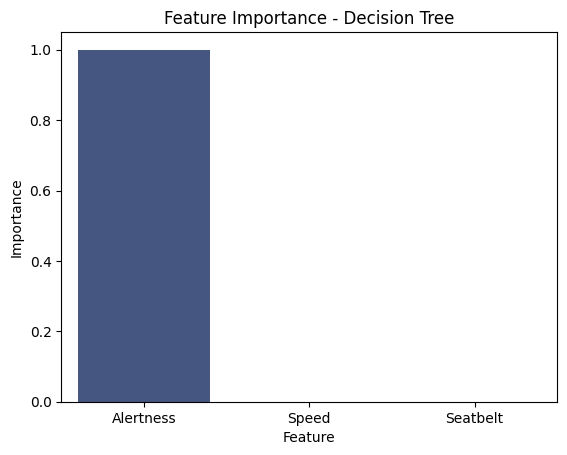

Prediction: Drowsy


In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Dataset
data = {
    'Speed':[120,40,150,220,89,240,310,410,180,270],
    'Alertness':[0.9,0.6,0.7,0.3,0.5,0.3,0.2,0.1,0.6,0.4],
    'Seatbelt':[1,0,1,1,0,1,1,0,0,1],
    'Drowsy':[0,0,0,1,0,1,1,1,0,1]
}
df = pd.DataFrame(data)
print(df.head())

 # Now in second step we do train-test split
X=df[['Speed','Alertness','Seatbelt']]
y=df['Drowsy']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.35,random_state=42)

# Now we Build and train Decision Tree Model
model_tree=DecisionTreeClassifier(random_state=42,max_depth=3)# max_depth how deep out decision tree goes
model_tree.fit(X_train,y_train)

# Now we make Predictions
y_pred_tree=model_tree.predict(X_test)
print("Predictions:",y_pred_tree.tolist())

# After prediction now we evalute tree model
accuracy_tree=accuracy_score(y_test,y_pred_tree)
print("It show the tree accurracy",round(accuracy_tree*100,2),"%")
cm=confusion_matrix(y_test,y_pred_tree)
sns.heatmap(cm,annot=True,fmt='d',cmap='Greens')
plt.title("Actual vs Predicted")
plt.xlabel("Actual")
plt.ylabel("Prediced")
plt.show()
print("\n Classification Report:\n",classification_report(y_test,y_pred_tree))

# Prediction is Done now we visualize the tree
plt.figure(figsize=(10,6))
plot_tree(model_tree,feature_names=X.columns,class_names=['Alert','Drowsy'],filled=True,rounded=True)
plt.title("Decision tree Visualization")
plt.show()

# Now we Compare With Ligistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

model_log=LogisticRegression()
model_log.fit(X_train_scaled,y_train)

y_pred_log=model_log.predict(X_test_scaled)
accuracy_log=accuracy_score(y_test,y_pred_log)
print("Logistic Regression Accurracy:",round(accuracy_log*100,2),"%")
print("Decision Tree Accuracy:",round(accuracy_tree*100,2),"%")

# Now we see the tree's superpower
importance=pd.DataFrame({
    'Feature':X.columns,
    'Importance':model_tree.feature_importances_
}).sort_values(by='Importance',ascending=False)
print(importance)
sns.barplot(x='Feature',y='Importance',data=importance,hue='Feature',palette='viridis',legend=False)
plt.title("Feature Importance - Decision Tree")
plt.show()

# Predict for a New Driver
new_driver=pd.DataFrame({
    'Speed':[330],
    'Alertness':[0.3],
    'Seatbelt':[1]
})
prediction_tree=model_tree.predict(new_driver)[0]
print("Prediction:","Drowsy" if prediction_tree==1 else "Alert")